In [1]:
%matplotlib inline

import pickle

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from tools.feature_format import featureFormat, targetFeatureSplit

In [2]:
def Draw(pred, features, poi, mark_poi=False, name="image.png",
         f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for i, _ in enumerate(pred):
        plt.scatter(features[i][0], features[i][1], color=colors[pred[i]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for i, _ in enumerate(pred):
            if poi[i]:
                plt.scatter(features[i][0], features[i][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [3]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load(open("tools/final_project_dataset.pkl", "rb"))

### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

## 2 Features

In [4]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.)

feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]

data = featureFormat(data_dict, features_list)
poi, finance_features = targetFeatureSplit(data)

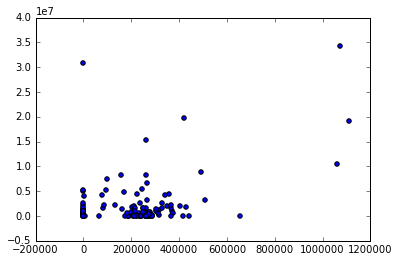

In [5]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)

for f1, f2 in finance_features:
    plt.scatter(f1, f2)
plt.show()

In [6]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

clf = KMeans(n_clusters=2)
clf.fit(finance_features)
pred = clf.predict(finance_features)

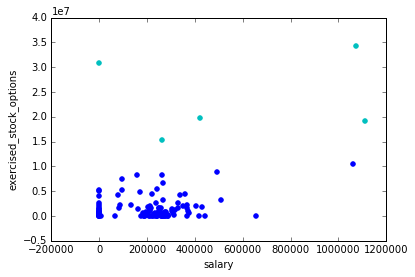

In [7]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")

## 3 Features

In [8]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]

data = featureFormat(data_dict, features_list)
poi, finance_features = targetFeatureSplit(data)

In [9]:
clf = KMeans(n_clusters=3)
clf.fit(finance_features)
pred = clf.predict(finance_features)

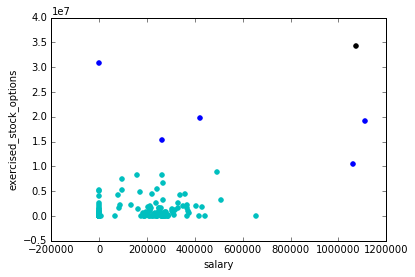

In [10]:
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")

---

In [11]:
exercised_stock_optoins = [float(value['exercised_stock_options']) for key, value in data_dict.items()]

In [12]:
max(exercised_stock_optoins)

34348384.0

In [13]:
min(exercised_stock_optoins)

3285.0

---

In [14]:
salaries = [float(value['salary']) for key, value in data_dict.items()]

In [15]:
max(salaries)

1111258.0

In [16]:
min(salaries)

477.0